In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
from main.data_tools.extract_ntuples import get_pd, get_np

In [3]:
file_loc = '/media/jykim/T7/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/tightcut_control_recon_mdst_5M.root'
base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.7 && D0_M<1.98'
signal_variables = ['D0_M','D0_cosHel_0']

In [4]:
pd_df_test = get_pd(file=file_loc, tree='control',base_filter=base_filter,variables=signal_variables)

In [5]:
# pd_data = get_pd(file=file_loc, tree='control',base_filter=base_filter,variables=signal_variables)
# pd_data['D0_cosHel_rad'] = pd_data.apply(lambda row: math.acos(row['D0_cosHel_0']) , axis=1)
# pd_data['D0_sinHel_0'] = pd_data.apply(lambda row: math.sin(row['D0_cosHel_rad']) , axis=1)

# plt.hist(pd_data['D0_sinHel_0'],bins=100);

In [6]:
pd_df_test = pd_df_test.query("D0_M>1.70 and D0_M<1.98")

In [8]:
len(pd_df_test)/5000000

0.0889616

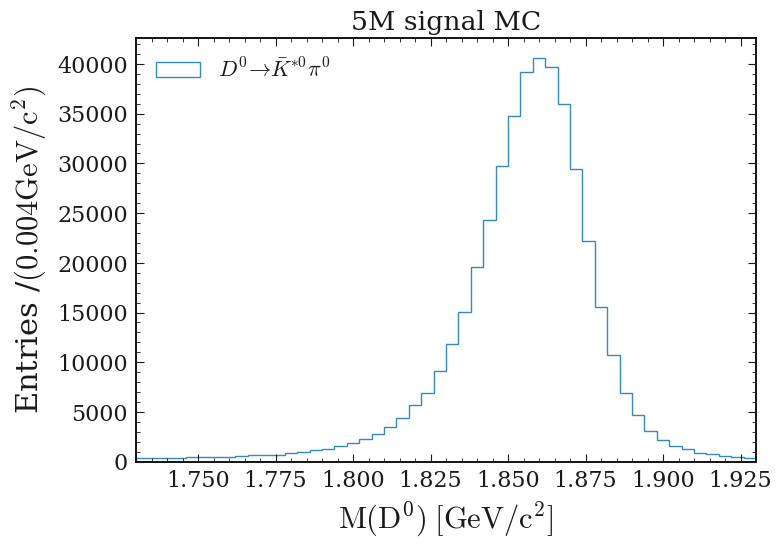

In [7]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.73,1.93,51)

xm = np.linspace(*xrange)

df = pd_df_test
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');

plt.legend(loc="upper left")
ax.set_title(r'5M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.73,1.93))
plt.xlim(1.73,1.93)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


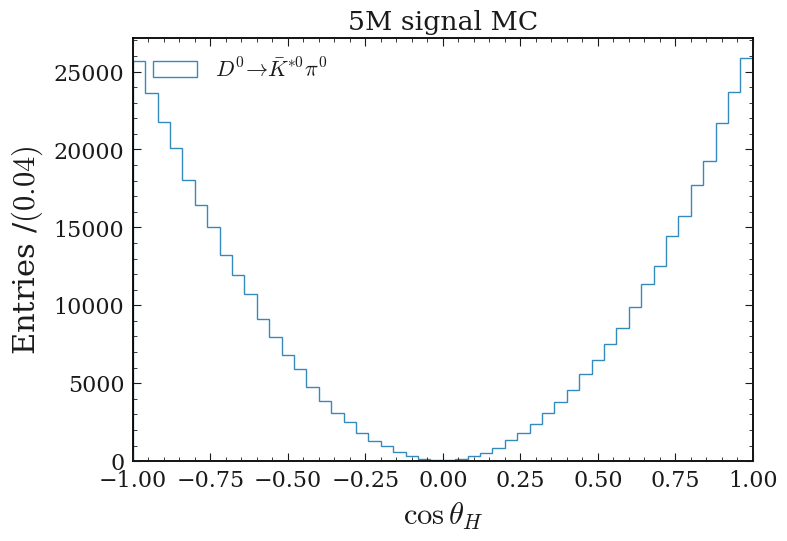

In [32]:
fig = plt.figure()
ax = fig.subplots()
xrange = (-1,1,51)

xm = np.linspace(*xrange)

df = pd_df_test
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');

plt.legend(loc="upper left")
ax.set_title(r'5M signal MC' )

n, xe = np.histogram(df["D0_cosHel_0"], bins=50, range=(-1.,1.))
plt.xlim(-1,1)
plt.xlabel(r"$\cos \theta_H$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');


#### np data

In [10]:
# base_filter = 'D0_M>1.70 && D0_M<1.98 && antiKstarpi0_rank_Dstp==1 && abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3'
base_filter = 'D0_M>1.70 && D0_M<1.98 && antiKstarpi0_rank_Dstp==1'

In [11]:
np_data = get_np(file=file_loc, tree='control',base_filter=base_filter,variables=signal_variables)

In [12]:
np_data

{'D0_M': ndarray([1.85958266, 1.81574905, 1.85430121, ..., 1.87995625, 1.83862972,
          1.8613528 ]),
 'D0_cosHel_0': ndarray([-0.84546189,  0.91751131, -0.9836108 , ..., -0.85120806,
          -0.62488581,  0.94874182])}

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 1] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.7,1.98]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.7,1.98]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.7,1.98]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Eval -- RooAbsTes

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file test.png has been created


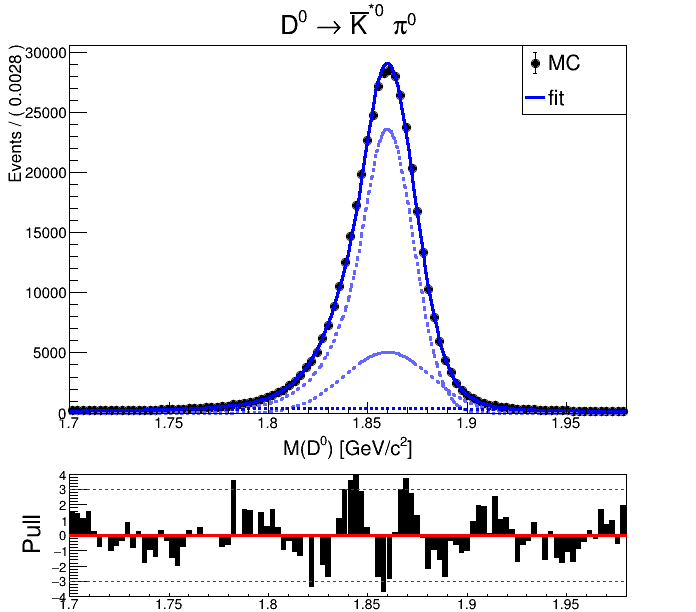

In [13]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, Novo_peak, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1 = ROOT.RooAddPdf("sig_sum1", "Signal1", [sig1, sig2], sig1frac)

sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)



data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=600)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.70)
xmax1 = ctypes.c_double(1.98)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

#  D0_M fitting 1D

In [38]:
# file_loc='/media/jykim/T7/storage/01_recon/pi0veto_calib/D2kmpippi0/ntuple/control_recon_mdst_DALITZ_30M.root'
file_loc = '/media/jykim/T7/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/tightcut_control_recon_mdst_5M.root'


base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.76 && D0_M<1.92'

In [39]:
np_data = get_np(file=file_loc, tree='control',base_filter=base_filter,variables=signal_variables)

In [40]:
len(np_data['D0_M'])/5000000

0.0870836

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 1] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.76,1.92]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.76,1.92]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.76,1.92]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 *****

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


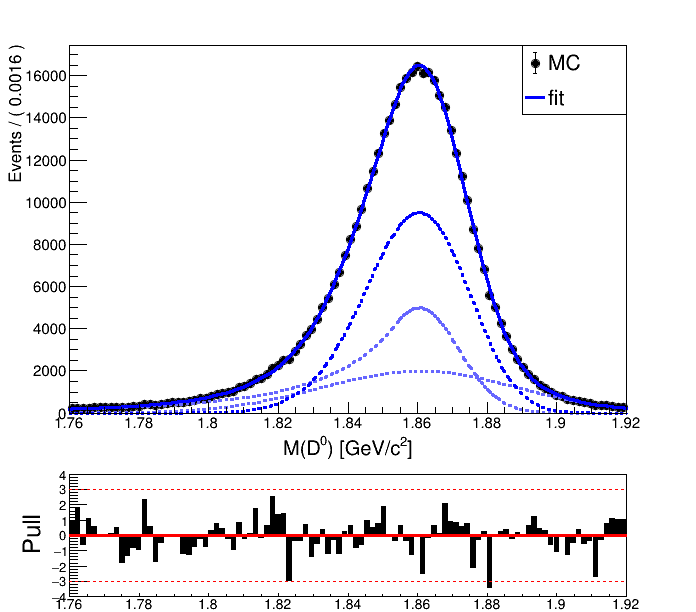

In [47]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.76, 1.92, "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1 = ROOT.RooAddPdf("sig_sum1", "Signal1", [sig1, sig2], sig1frac)

sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)



data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.76,1.92))

# r.Print()
canv.cd(1) 
frame = x.frame(Title=" ")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=600)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.76)
xmax1 = ctypes.c_double(1.92)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 1] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.7,1.98]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.7,1.98]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.7,1.98]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 ********

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


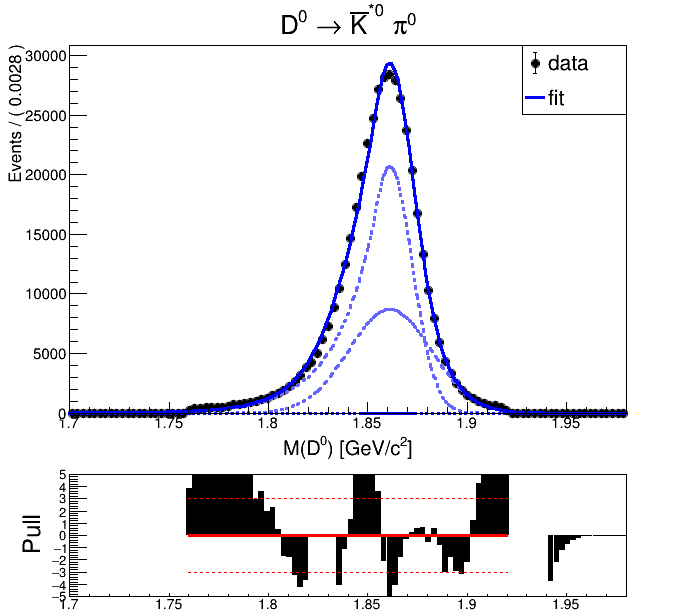

In [41]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.70, 1.98, "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0,0.5)

alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)
alpha2 = ROOT.RooRealVar("alpha2", "width of gaussians", 0.5,0,10)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 10,0,200)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
sig3 = ROOT.RooCBShape("sig3", "Signal component 2", x, mean, sigma3, alpha2, n_CB2)

# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1 = ROOT.RooAddPdf("sig_sum1", "Signal1", [sig1, sig2], sig1frac)

sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)



data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.70,1.98))

# r.Print()
canv.cd(1) 
frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=600)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "data", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-5.)
pullplot.SetMaximum(5.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.76)
xmax1 = ctypes.c_double(1.92)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma3' with range [0, 0.5] of the RooGaussian 'sig3' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.76,1.92]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.76,1.92]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.76,1.92]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


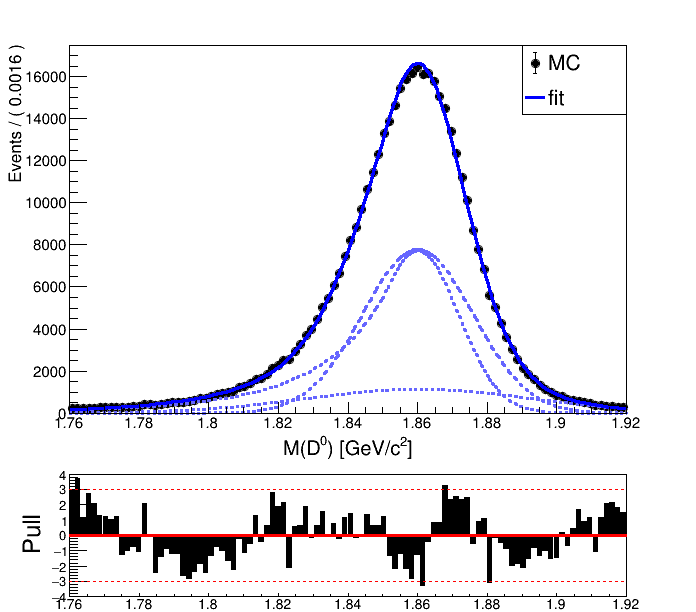

In [48]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.76, 1.92, "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.02,0,0.5)

alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
sig3 = ROOT.RooGaussian("sig3", "Signal component 1", x, mean, sigma3)

# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, Novo_peak, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig_sum1 = ROOT.RooAddPdf("sig_sum1", "Signal1", [sig1, sig2], sig1frac)

sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)



data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.76,1.92))

# r.Print()
canv.cd(1) 
frame = x.frame(Title=" ")
#rame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.76)
xmax1 = ctypes.c_double(1.92)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.76,1.92]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.76,1.92]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.76,1.92]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 ***

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


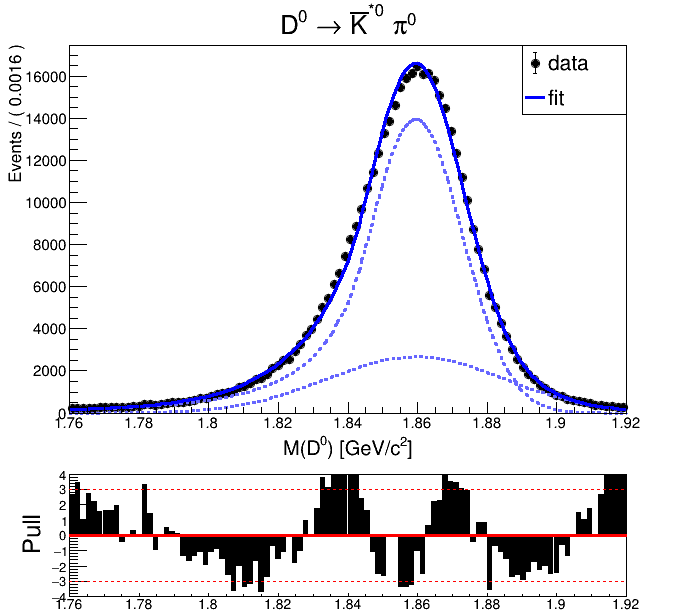

In [42]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.76, 1.92, "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.5)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.02,0,0.5)

alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 10,0,200)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooGaussian("sig3", "Signal component 1", x, mean, sigma3)

# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, Novo_peak, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal1", [sig1, sig2], sig1frac)

# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
# sig = ROOT.RooAddPdf("sig", "Signal", [sig3, sig_sum1], sig2frac)



data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = sig.fitTo(data,NumCPU=12, Range=(1.76,1.92))

# r.Print()
canv.cd(1) 
frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)

sig.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "data", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.76)
xmax1 = ctypes.c_double(1.92)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

# D0_cosHel_0 fitting

In [33]:

file_loc = '/media/jykim/T7/storage/01_recon/pi0veto_calib/D2antiKstarpi0/ntuple/tightcut_control_recon_mdst_5M.root'
base_filter = 'antiKstarpi0_rank_Dstp==1 && D0_M>1.7 && D0_M<1.98'
signal_variables = ['D0_M','D0_cosHel_0']
# base_filter = 'D0_M>1.70 && D0_M<1.98 && antiKstarpi0_rank_Dstp==1 && abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3'
np_data = get_np(file=file_loc, tree='control',base_filter=base_filter,variables=signal_variables)

In [34]:
ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

94479018475408

(MyPdf_xsquared) An instance of MyPdf_xsquared.


Info in <TUnixSystem::ACLiC>: creating shared library /home/jykim/workspace/DRAW_and_FITTING/main/Fitting_1D/control_study/./MyPdf_xsquared_cxx.so


[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'fit' created with bounds [-1,1]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'NormalizationRangeForfit' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'fit_nll_pdf_' created with bounds [-1,1]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **   10 **SET PRINT           1
 **********
 **********
 ** 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test_cosHel.png has been created


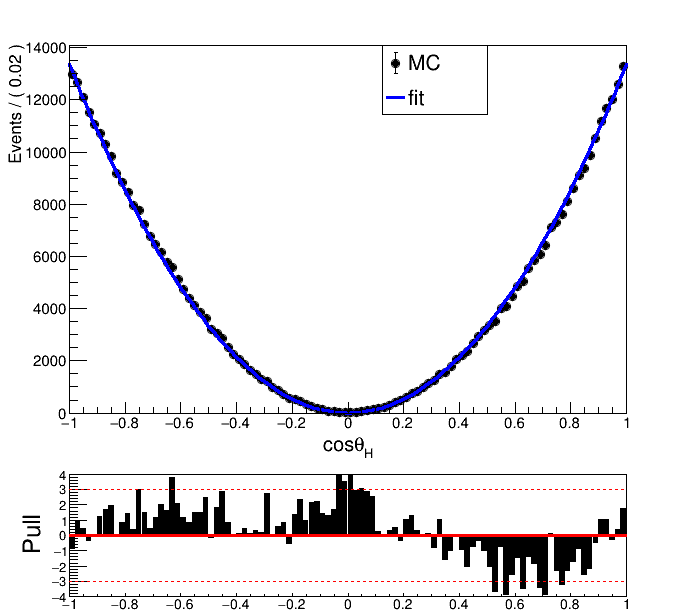

In [36]:
xrange = (-1,1)
file_name='test_cosHel.png'


x = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", xrange[0], xrange[1], "")
c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
pdf = ROOT.MyPdf_xsquared("pdf", "pdf", x, c0)

data = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [x])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

# r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
r = pdf.fitTo(data,NumCPU=12, Range=(xrange[0],xrange[1]))

# r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
# pdf.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# pdf.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# pdf.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

pdf.plotOn(frame, Name="fitting")


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.55, 0.75, 0.7, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(xrange[0])
xmax1 = ctypes.c_double(xrange[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file_name)